<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Shapiro-Wilk Test

</h1><center/>

**Link to the article** : 

1 - Collect the data ( I will just generate some random data) where:
- Segment A (loyal customers): stable spending around $500
- Segment B (new customers): many spend little, a few spend a lot (right skewed)

In [1]:
import numpy as np

np.random.seed(42)

segmentA = np.random.normal(loc=500, scale=50, size=40)
segmentB = np.random.exponential(scale=100, size=40) + 300

2- Check histograms and Q–Q plots to see if the distributions look normal

**Note** : A Q–Q plot helps us see if our data follows a certain distribution (like normal) by comparing our data's values with the values that distribution would produce
- X-axis : theoretical quantiles (what the chosen distribution expects)
- Y-axis : sample quantiles (your actual data)

I will write an article about it in another time !

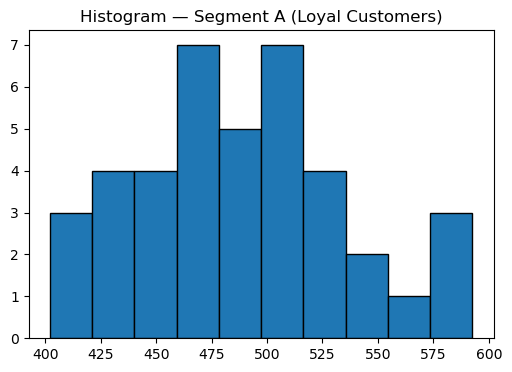

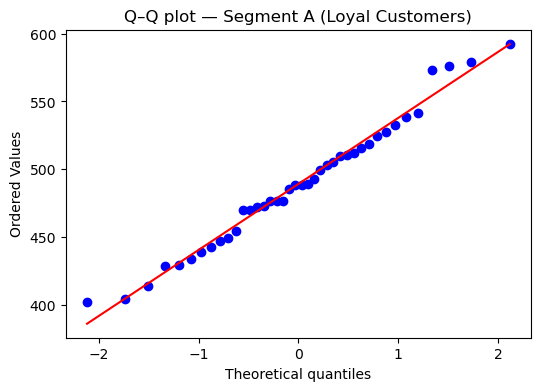

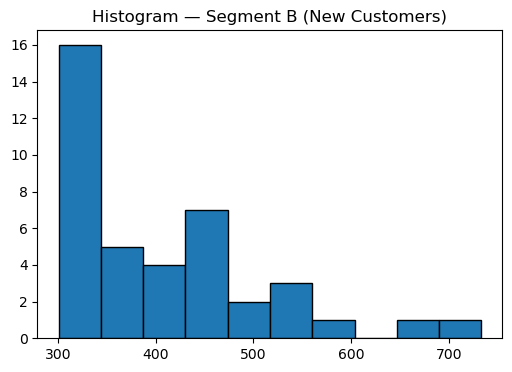

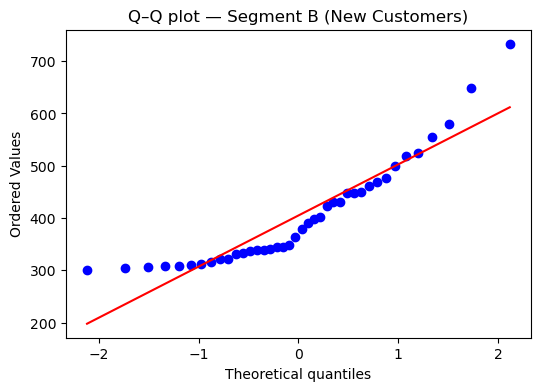

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

def plot_hist_and_qq(x, title=""):
    plt.figure(figsize=(6,4))
    plt.hist(x, bins=10, edgecolor="black")
    plt.title(f"Histogram — {title}")
    plt.show()

    plt.figure(figsize=(6,4))
    stats.probplot(x, dist="norm", plot=plt)
    plt.title(f"Q–Q plot — {title}")
    plt.show()

plot_hist_and_qq(segmentA, "Segment A (Loyal Customers)")
plot_hist_and_qq(segmentB, "Segment B (New Customers)")

3 - Apply Shapiro–Wilk test

In [3]:
from scipy.stats import shapiro

alpha = 0.05

for name, data in [("Segment A", segmentA), ("Segment B", segmentB)]:
    W, p = shapiro(data)
    decision = "Fail to reject H0 (≈ normal)" if p > alpha else "Reject H0 (not normal)"
    print(f"{name}: W={W:.4f}, p={p:.4f} --> {decision}")

Segment A: W=0.9792, p=0.6604 --> Fail to reject H0 (≈ normal)
Segment B: W=0.8623, p=0.0002 --> Reject H0 (not normal)


4 - **Optional : Apply Log transformation**  
- We can use log transformation on the x to reduce the impact of the outlier for the segment B, then plot the Q-Q Plot again and redo the test
- I added "+1" to avoid log(0)

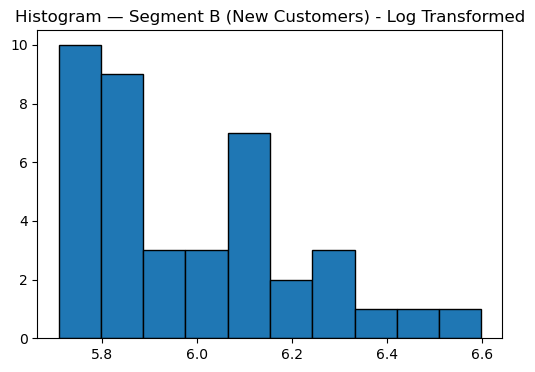

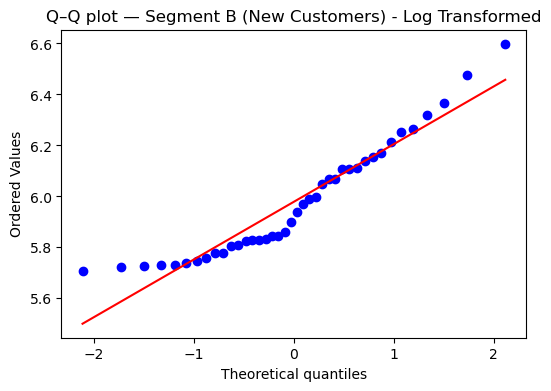

Segment B (Log Transformed): W=0.9108, p=0.0040 --> Reject H0 (not normal)


In [4]:
segmentB_log = np.log(segmentB + 1)  # +1 to avoid log(0)

plot_hist_and_qq(segmentB_log, "Segment B (New Customers) - Log Transformed")

W_log, p_log = shapiro(segmentB_log)
decision_log = "Fail to reject H0 (≈ normal)" if p_log > alpha else "Reject H0 (not normal)"
print(f"Segment B (Log Transformed): W={W_log:.4f}, p={p_log:.4f} --> {decision_log}")